# Reviews Analysis

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Combining Dataframe with all the products information

### Data set 5: Order review

In [2]:
data5_reviews= pd.read_csv('brazilian_e_commerce_public/data_sets/5_olist_order_reviews_dataset.csv')
data5_reviews.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


In [3]:
data5_reviews['review_comment_message'].isna().sum()

58247

In [4]:
data5_reviews['left_review'] = 0

In [5]:
data5_reviews.loc[:,'left_review'][data5_reviews['review_comment_message'].isna() == False ] = 1

/var/folders/yq/6pm1lcds6ln5qlsjc5y8fly00000gn/T/ipykernel_3089/3521399029.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data5_reviews.loc[:,'left_review'][data5_reviews['review_comment_message'].isna() == False ] = 1


In [6]:
data5_reviews.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,left_review
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59,0
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13,0
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24,0
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06,1
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53,1


In [7]:
data5_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   review_id                99224 non-null  object
 1   order_id                 99224 non-null  object
 2   review_score             99224 non-null  int64 
 3   review_comment_title     11568 non-null  object
 4   review_comment_message   40977 non-null  object
 5   review_creation_date     99224 non-null  object
 6   review_answer_timestamp  99224 non-null  object
 7   left_review              99224 non-null  int64 
dtypes: int64(2), object(6)
memory usage: 6.1+ MB


## Final Dataset

In [8]:
#data_f2_olist = pd.read_csv('final_datasets/data_f2_olist.csv')
data_f2_olist.head()

,customer_id,customer_unique_id,zip_code_prefix_customer,customer_city,sc_state_customer,geolocation_lat_customer,geolocation_lng_customer,state_customer,region_customer,order_id,...,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english,sub_group_rank
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,-20.498489,-47.396929,São Paulo,southeast,00e7ee1b050b8499577073aeb2a297a1,...,moveis_escritorio,41.0,1141.0,1.0,8683.0,54.0,64.0,31.0,office_furniture,8936
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,-23.727992,-46.542848,São Paulo,southeast,29150127e6685892b6eab3eec79f59c7,...,utilidades_domesticas,43.0,1002.0,3.0,10150.0,89.0,15.0,40.0,housewares,5476
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,-23.531642,-46.656289,São Paulo,southeast,b2059ed67ce144a36e2aa97d2c9e9ad2,...,moveis_escritorio,55.0,955.0,1.0,8267.0,52.0,52.0,17.0,office_furniture,241
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,-23.499702,-46.185233,São Paulo,southeast,951670f92359f4fe4a63112aa7306eba,...,moveis_escritorio,48.0,1066.0,1.0,12160.0,56.0,51.0,28.0,office_furniture,1349
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,-22.975100,-47.142925,São Paulo,southeast,6b7d50bd145f6fc7f33cebabd7e49d0f,...,casa_conforto,61.0,407.0,1.0,5200.0,45.0,15.0,35.0,home_confort,5544


In [9]:
data_f2_olist.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110180 entries, 0 to 110179
Data columns (total 48 columns):
 #   Column                                              Non-Null Count   Dtype  
---  ------                                              --------------   -----  
 0   customer_id                                         110180 non-null  object 
 1   customer_unique_id                                  110180 non-null  object 
 2   zip_code_prefix_customer                            110180 non-null  int64  
 3   customer_city                                       110180 non-null  object 
 4   sc_state_customer                                   110180 non-null  object 
 5   geolocation_lat_customer                            109892 non-null  float64
 6   geolocation_lng_customer                            109892 non-null  float64
 7   state_customer                                      110180 non-null  object 
 8   region_customer                                     110180 non-n

In [10]:
data_f3_olist= data_f2_olist.merge(data5_reviews, how='left',on= 'order_id')

In [11]:
data_f3_olist.head()

,customer_id,customer_unique_id,zip_code_prefix_customer,customer_city,sc_state_customer,geolocation_lat_customer,geolocation_lng_customer,state_customer,region_customer,order_id,...,product_width_cm,product_category_name_english,sub_group_rank,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,left_review
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,-20.498489,-47.396929,São Paulo,southeast,00e7ee1b050b8499577073aeb2a297a1,...,31.0,office_furniture,8936,88b8b52d46df026a9d1ad2136a59b30b,4.0,NaN,NaN,2017-05-26 00:00:00,2017-05-30 22:34:40,0.0
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,-23.727992,-46.542848,São Paulo,southeast,29150127e6685892b6eab3eec79f59c7,...,40.0,housewares,5476,02fc48a9efa3e3d0f1a8ea26507eeec3,5.0,NaN,NaN,2018-01-30 00:00:00,2018-02-10 22:43:29,0.0
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,-23.531642,-46.656289,São Paulo,southeast,b2059ed67ce144a36e2aa97d2c9e9ad2,...,17.0,office_furniture,241,5ad6695d76ee186dc473c42706984d87,5.0,NaN,NaN,2018-06-15 00:00:00,2018-06-15 12:10:59,0.0
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,-23.499702,-46.185233,São Paulo,southeast,951670f92359f4fe4a63112aa7306eba,...,28.0,office_furniture,1349,059a801bb31f6aab2266e672cab87bc5,5.0,NaN,NaN,2018-03-29 00:00:00,2018-04-02 18:36:47,0.0
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,-22.975100,-47.142925,São Paulo,southeast,6b7d50bd145f6fc7f33cebabd7e49d0f,...,35.0,home_confort,5544,8490879d58d6c5d7773f2739a03f089a,5.0,a melhor nota,O baratheon è esxelente Amo adoro o baratheon,2018-08-10 00:00:00,2018-08-17 01:59:52,1.0


In [12]:
len(data_f3_olist['order_id'].unique())

96461

In [13]:
data_f3_olist.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110823 entries, 0 to 110822
Data columns (total 55 columns):
 #   Column                                              Non-Null Count   Dtype  
---  ------                                              --------------   -----  
 0   customer_id                                         110823 non-null  object 
 1   customer_unique_id                                  110823 non-null  object 
 2   zip_code_prefix_customer                            110823 non-null  int64  
 3   customer_city                                       110823 non-null  object 
 4   sc_state_customer                                   110823 non-null  object 
 5   geolocation_lat_customer                            110530 non-null  float64
 6   geolocation_lng_customer                            110530 non-null  float64
 7   state_customer                                      110823 non-null  object 
 8   region_customer                                     110823 non-n

In [14]:
#data_f3_olist.to_csv('final_datasets/data_f3_olist.csv', index= False)

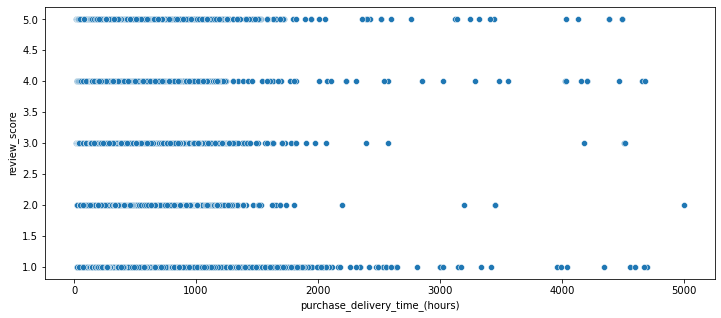

In [24]:
plt.subplots(figsize= (12,5))
sns.scatterplot(data= data_f3_olist, x='delta_purchase_delivered_customer',y='review_score')
plt.xlabel('purchase_delivery_time_(hours)')
plt.ylabel('review_score');